<a href="https://colab.research.google.com/github/yulyartamisagala/Project1/blob/main/Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [85]:
df = pd.read_csv('/content/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df.shape

(307511, 122)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [88]:
df.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64
AMT_REQ_CREDIT_BUREAU_WEEK,float64
AMT_REQ_CREDIT_BUREAU_MON,float64
AMT_REQ_CREDIT_BUREAU_QRT,float64


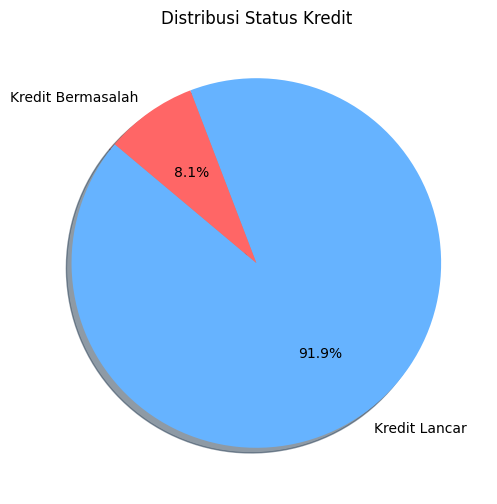

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [89]:
target_counts = df['TARGET'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=['Kredit Lancar', 'Kredit Bermasalah'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'], startangle=140, shadow=True)
plt.title('Distribusi Status Kredit')

# Menampilkan plot
plt.show()
print(target_counts)

Search Insight from Data

The number of customers who apply for loans

In [90]:
noc = df.groupby('TARGET')['CODE_GENDER'].count().reset_index()
noc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

noc['Customers_pct'] = round(noc.Customers / noc.Customers.sum(), 2)
noc

,TARGET,Customers,Customers_pct
0,0,282686,0.92
1,1,24825,0.08


From the table above, we can see 92% did not had any problems in repaying the loan in given time and 8% was have problems, so let's dig deeper into the criteria for whether the customer not had any problems in repaying the loan.

Marital status

In [91]:
df.NAME_FAMILY_STATUS.value_counts()

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


From table above, there are 6 category about marital, let's simplify it into 2 categories, namely married and unmarried

married = people who have a partner
unmarried = people who not have a partner or have had a partner

In [92]:
Marital_status = []
married = ['Married','Civil marriage']
for i in df['NAME_FAMILY_STATUS']:
  if i in married:
    Marital_status.append('Married')
  else:
    Marital_status.append('Unmarried')
df['Marital_status'] = Marital_status
df.drop(columns='NAME_FAMILY_STATUS',inplace=True)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Unmarried
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Married
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Married
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried


In [93]:
ms_acc = df[df['TARGET'] == 0].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
ms_acc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

ms_acc['Customers_pct'] = round(noc.Customers / noc.Customers.sum(), 2)
ms_acc

,Marital_status,Customers,Customers_pct
0,Married,208396,0.92
1,Unmarried,74290,0.08


92% from customer that dont have any problems to pay the loan is married.

In [94]:
ms_nacc = df[df['TARGET'] == 1].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
ms_nacc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

ms_nacc['Customers_pct'] = round(ms_nacc.Customers / ms_nacc.Customers.sum(), 2)
ms_nacc

,Marital_status,Customers,Customers_pct
0,Married,17811,0.72
1,Unmarried,7014,0.28


In [95]:
ms= df[df['Marital_status'] == 'Unmarried'].groupby(['TARGET', 'Marital_status'])['CODE_GENDER'].count().reset_index()
ms.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

ms['Customers_pct'] = round(ms.Customers / ms.Customers.sum(), 2)
ms

,TARGET,Marital_status,Customers,Customers_pct
0,0,Unmarried,74290,0.91
1,1,Unmarried,7014,0.09


In [96]:
ms1= df[df['Marital_status'] == 'Married'].groupby(['TARGET', 'Marital_status'])['CODE_GENDER'].count().reset_index()
ms1.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

ms1['Customers_pct'] = round(ms1.Customers / ms1.Customers.sum(), 2)
ms1

,TARGET,Marital_status,Customers,Customers_pct
0,0,Married,208396,0.92
1,1,Married,17811,0.08


It's nothing special at marital status, because the number of loan applications received between the two categories has a value that is not much different

Contract Type

In [97]:
ct = df.groupby(['TARGET', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by = 'NAME_CONTRACT_TYPE')
ct.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

name_of_ct = list(ct['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in name_of_ct:
    data = ct[ct['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

ct['Percent'] = percentage
ct

,TARGET,NAME_CONTRACT_TYPE,Customers,Percent
0,0,Cash loans,255011,0.92
2,1,Cash loans,23221,0.08
1,0,Revolving loans,27675,0.95
3,1,Revolving loans,1604,0.05


is nothing special in Contract_type, Percentage of customer have problems to pay the loans is similar. but cash loans is customer favorite.

Occupation Type

In [98]:
ot = df.groupby(['TARGET', 'OCCUPATION_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by=['OCCUPATION_TYPE', 'TARGET'])
ot.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

name_of_ot = list(ot['OCCUPATION_TYPE'].unique())
percentage = []

for i in name_of_ot:
    data = ot[ot['OCCUPATION_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

ot['percentage'] = percentage
ot

,TARGET,OCCUPATION_TYPE,Customers,percentage
0,0,Accountants,9339,0.95
18,1,Accountants,474,0.05
1,0,Cleaning staff,4206,0.90
19,1,Cleaning staff,447,0.10
2,0,Cooking staff,5325,0.90
20,1,Cooking staff,621,0.10
3,0,Core staff,25832,0.94
21,1,Core staff,1738,0.06
4,0,Drivers,16496,0.89
22,1,Drivers,2107,0.11


From the table above, we can see HR staff, IT staff and Realty agents have a high percentage of accepted loan applications (92% - 94%) but the number of customers with these jobs who apply for loans is less than a thousand customers, so it is recommended that we create campaigns for these three jobs

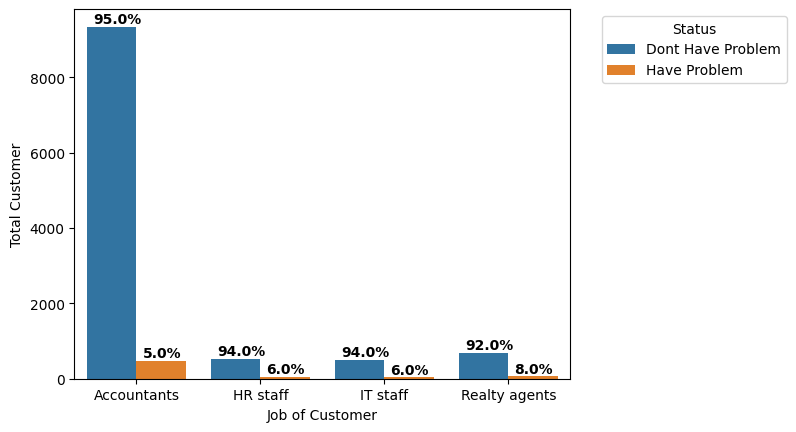

In [99]:
ot_2 = ot[ot['OCCUPATION_TYPE'].isin(['HR staff', 'IT staff', 'Realty agents', 'Accountants'])]
ot_2 = ot_2.reset_index()
ot_2.drop(columns = 'index', inplace=True)

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

ot_2['TARGET'] = ot_2['TARGET'].map(mapping_target)


ax = sns.barplot(x = 'OCCUPATION_TYPE', y= 'Customers', hue= 'TARGET', data = ot_2)
plt.xlabel('Job of Customer')
plt.ylabel('Total Customer')
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

for i, v in enumerate(ot_2['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v + 100, s= str(ot_2['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 100, s= str(ot_2['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)

Age of the customer

Since there is no customer age column, we will create it using the DAYS_BIRTH column which contains data on the difference between today and the customer's birthday

In [100]:
df['Age'] = np.floor(df['DAYS_BIRTH'] / -365).astype(int)
df.drop(columns= 'DAYS_BIRTH', inplace=True)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Unmarried,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Married,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Married,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried,54


now we make a grup based on customer age following this rules :

Young Adult = 20 - 35
Adult = 35 - 50
Older > 50

In [101]:
age_cat = []
for i in df['Age']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

df['Age_category'] = age_cat

In [102]:
g_age = df.groupby(['TARGET', 'Age_category'])['CODE_GENDER'].count().reset_index().sort_values('Age_category').reset_index()
g_age.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
g_age.drop(columns = 'index', inplace=True)

name_of_ot = list(g_age['Age_category'].unique())
percentage = []

for i in name_of_ot:
    data = g_age[g_age['Age_category'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

g_age['percentage'] = percentage

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

g_age['TARGET'] = g_age['TARGET'].map(mapping_target)
g_age

,TARGET,Age_category,Customers,percentage
0,Dont Have Problem,Adult,108678,0.92
1,Have Problem,Adult,9403,0.08
2,Dont Have Problem,Older,91718,0.94
3,Have Problem,Older,5469,0.06
4,Dont Have Problem,Young Adult,82290,0.89
5,Have Problem,Young Adult,9953,0.11


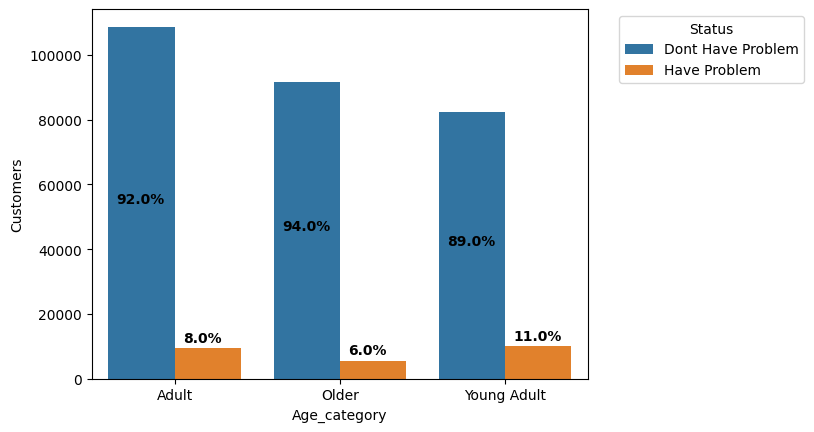

In [103]:
ax = sns.barplot(x = 'Age_category', y= 'Customers', hue= g_age.TARGET, data = g_age)
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

for i, v in enumerate(g_age['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v/2, s= str(g_age['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 2000, s= str(g_age['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)


From graphic above, we can see that Adult (35-50 years old) is the age category that has the largest loan applications with 92% of the loans being paid off without experiencing any problems, so we can target adults to have a loan in Home credit Indonesia.

In [104]:
df.drop(columns = 'Age_category', inplace=True)

In [105]:
itc = df.groupby(['TARGET', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE']).reset_index()
itc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
itc.drop(columns = 'index', inplace=True)

income_type   = list(itc['NAME_INCOME_TYPE'].unique())
percentage  = []

for i in income_type:
    data = itc[itc.NAME_INCOME_TYPE == i]
    contract_type = list(data['NAME_CONTRACT_TYPE'].unique())
    for x in contract_type:
        data2 = data[data.NAME_CONTRACT_TYPE == x]
        total = data2['Customers'].sum()
        for y,z in enumerate(data2['Customers']):
            pct = round(z / total, 2)
            percentage.append(pct)

itc['percentage'] = percentage
itc

,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,Customers,percentage
0,0,Businessman,Revolving loans,10,1.00
1,0,Commercial associate,Cash loans,58662,0.92
2,1,Commercial associate,Cash loans,4990,0.08
3,0,Commercial associate,Revolving loans,7595,0.95
4,1,Commercial associate,Revolving loans,370,0.05
5,1,Maternity leave,Cash loans,2,1.00
6,0,Maternity leave,Revolving loans,3,1.00
7,0,Pensioner,Cash loans,49151,0.95
8,1,Pensioner,Cash loans,2842,0.05
9,0,Pensioner,Revolving loans,3229,0.96


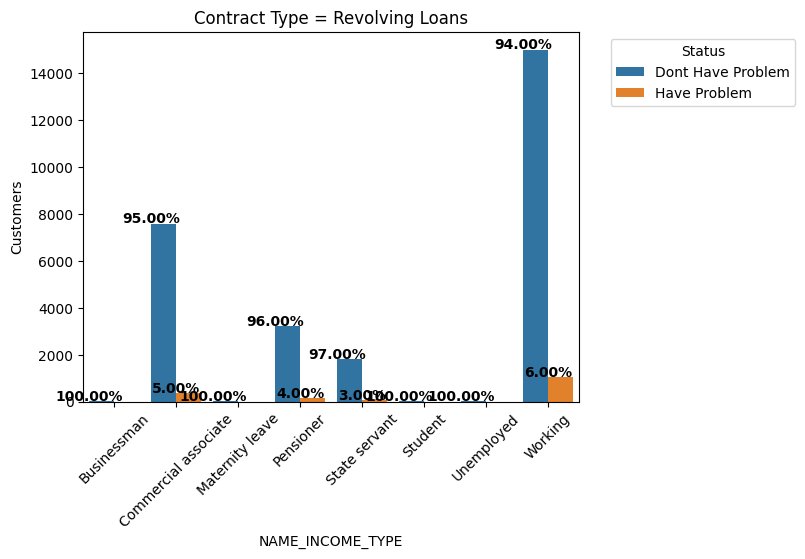

In [106]:
itc_rl = itc[itc['NAME_CONTRACT_TYPE'] == 'Revolving loans'].reset_index()

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

itc_rl['TARGET'] = itc_rl['TARGET'].map(mapping_target)

ax = sns.barplot(x = 'NAME_INCOME_TYPE', y= 'Customers', data = itc_rl, hue = 'TARGET')
plt.title('Contract Type = Revolving Loans')
plt.xticks(rotation=45)
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

i = 0
itc_p = itc_rl.sort_values('TARGET').reset_index()

# Iterate through the data used to create the plot instead of patches
for p, perc in zip(ax.patches, itc_p['percentage']):
    width, height = p.get_x(), p.get_height()
    if np.isnan(height):  # Jika nilai NaN, lewati
        continue
    plt.text(width, height + 20, s=f"{perc*100:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()

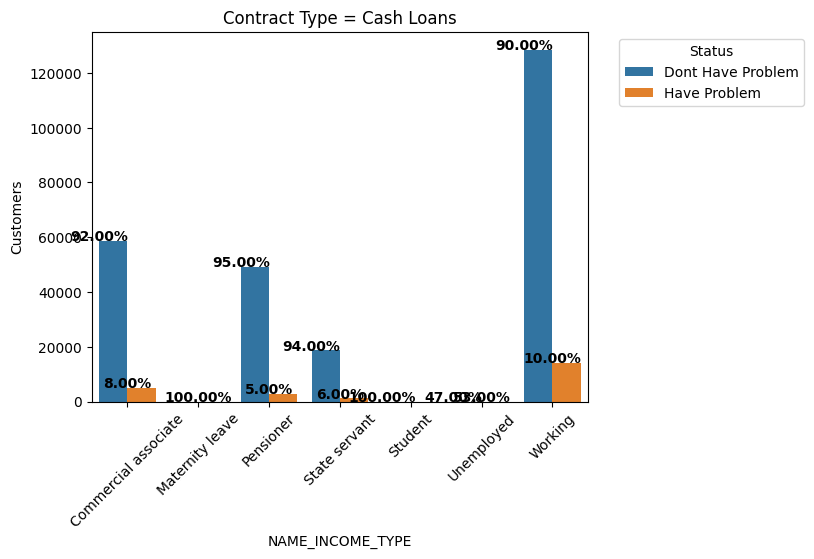

In [107]:
itc_cl = itc[itc['NAME_CONTRACT_TYPE'] == 'Cash loans'].reset_index()

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

itc_cl['TARGET'] = itc_cl['TARGET'].map(mapping_target)

ax = sns.barplot(x = 'NAME_INCOME_TYPE', y= 'Customers', data = itc_cl, hue = 'TARGET')
plt.title('Contract Type = Cash Loans')
plt.xticks(rotation=45)
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

i = 0
itc_p2 = itc_cl.sort_values('TARGET').reset_index()

# Iterate through the data used to create the plot instead of patches
for p, perc in zip(ax.patches, itc_p2['percentage']):
    width, height = p.get_x(), p.get_height()
    if np.isnan(height):  # Jika nilai NaN, lewati
        continue
    plt.text(width, height + 20, s=f"{perc*100:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()

Data Cleaning

Detecting and remove data duplicate

In [108]:
df.duplicated().sum()

np.int64(0)

In [109]:
count_nv = pd.DataFrame(df.isnull().sum(),columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = (count_nv['Total Null Data']/len(df))*100
count_nv[count_nv['Percentage']>50].sort_values('Percentage',ascending=False)
count_nv


,index,Total Null Data,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
118,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
119,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
120,Marital_status,0,0.000000


we will remove the feature that have more than 40% null data

In [110]:
data = list(count_nv[count_nv['Percentage']>40]['index'])
df = df.drop(columns = data)
df = df.drop(columns = 'SK_ID_CURR')
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Unmarried,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Married,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Married,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Unmarried,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Unmarried,25
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Unmarried,56
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,Unmarried,41
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Married,32


In [111]:
count_nv = pd.DataFrame(df.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(df) ) * 100
still_null = count_nv[count_nv['Percentage'] != 0].sort_values(by='Percentage', ascending=False)

In [112]:
a = list(still_null['index'])
df[a].dtypes

for i in a:
    data = df[i]
    types = str(data.dtype)
    if types == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [113]:
count_nv = pd.DataFrame(df.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(df) ) * 100
count_nv[count_nv['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage


Replace unknown value

In [114]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['XNA'], df['CODE_GENDER'].mode()[0])
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace(['XNA'], df['ORGANIZATION_TYPE'].mode()[0])

Remove flag document column

In [115]:
FLAG_DOCUMENT = [col for col in df.columns if 'FLAG_DOCUMENT' in col]
df.drop(columns = FLAG_DOCUMENT, axis=1, inplace=True)

Feature Engineering

In [116]:
x = df.drop(columns = 'TARGET')

Numeric data type

In [117]:
num = x.select_dtypes(exclude='object')
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,1,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,-1186.0,-291,1,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-225,-4260.0,-2531,1,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039,-9833.0,-2437,1,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038,-4311.0,-3458,1,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54


Change the negative value on column to positive value

In [118]:
negative_column = num.columns[(num < 0).any()].tolist()
num[negative_column] = num[negative_column] * -1
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,637,3648.0,2120,1,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1188,1186.0,291,1,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,225,4260.0,2531,1,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,3039,9833.0,2437,1,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,3038,4311.0,3458,1,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54


Look for a numeric data type that has a unique value > 2

In [119]:
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

Look at the distribution of data

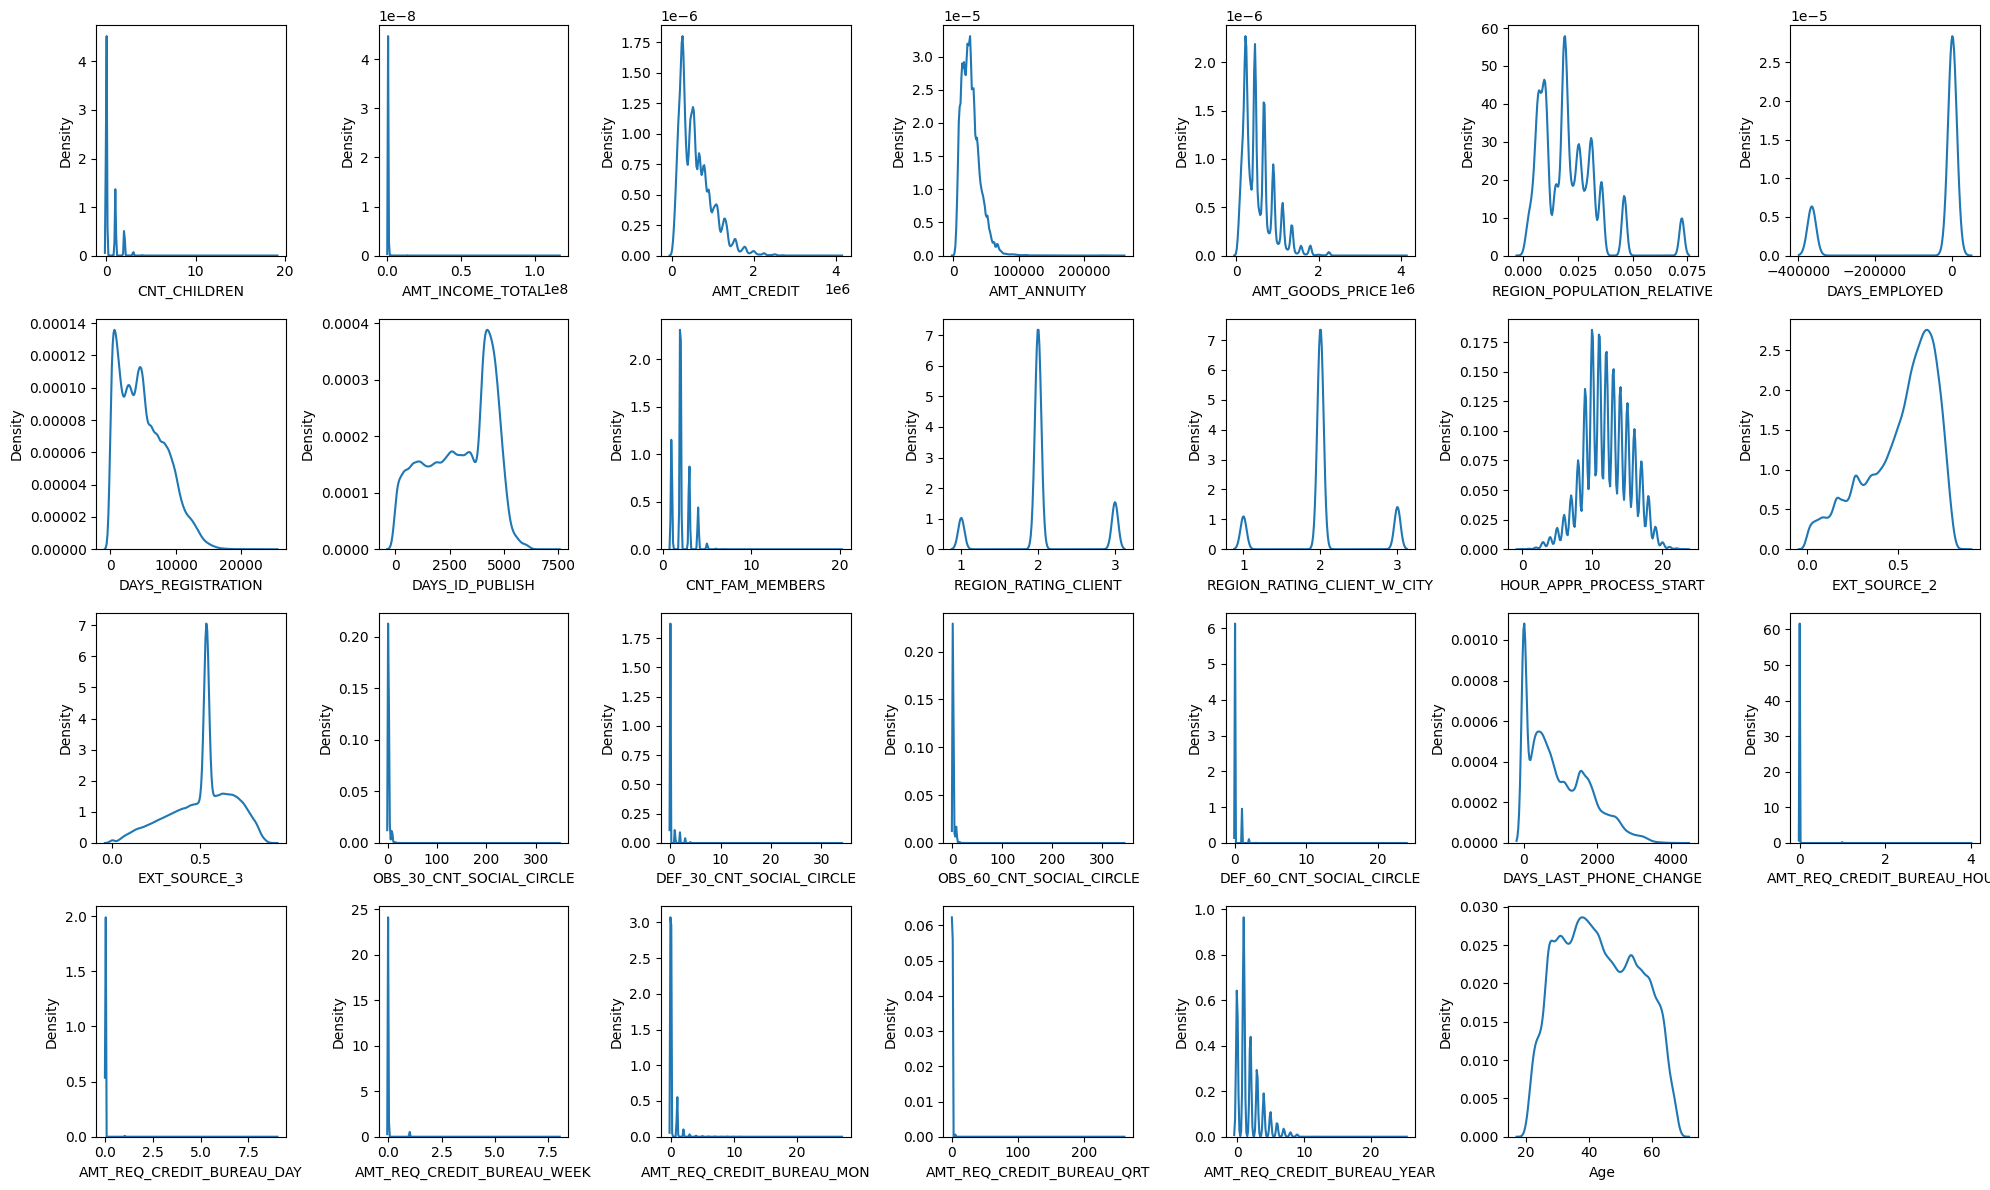

In [120]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(4,7,i)
    sns.kdeplot(data=num[num_a], x=num[column])
    plt.tight_layout()

the data distribution is not close to the normal distribution, so it needs to be normalized

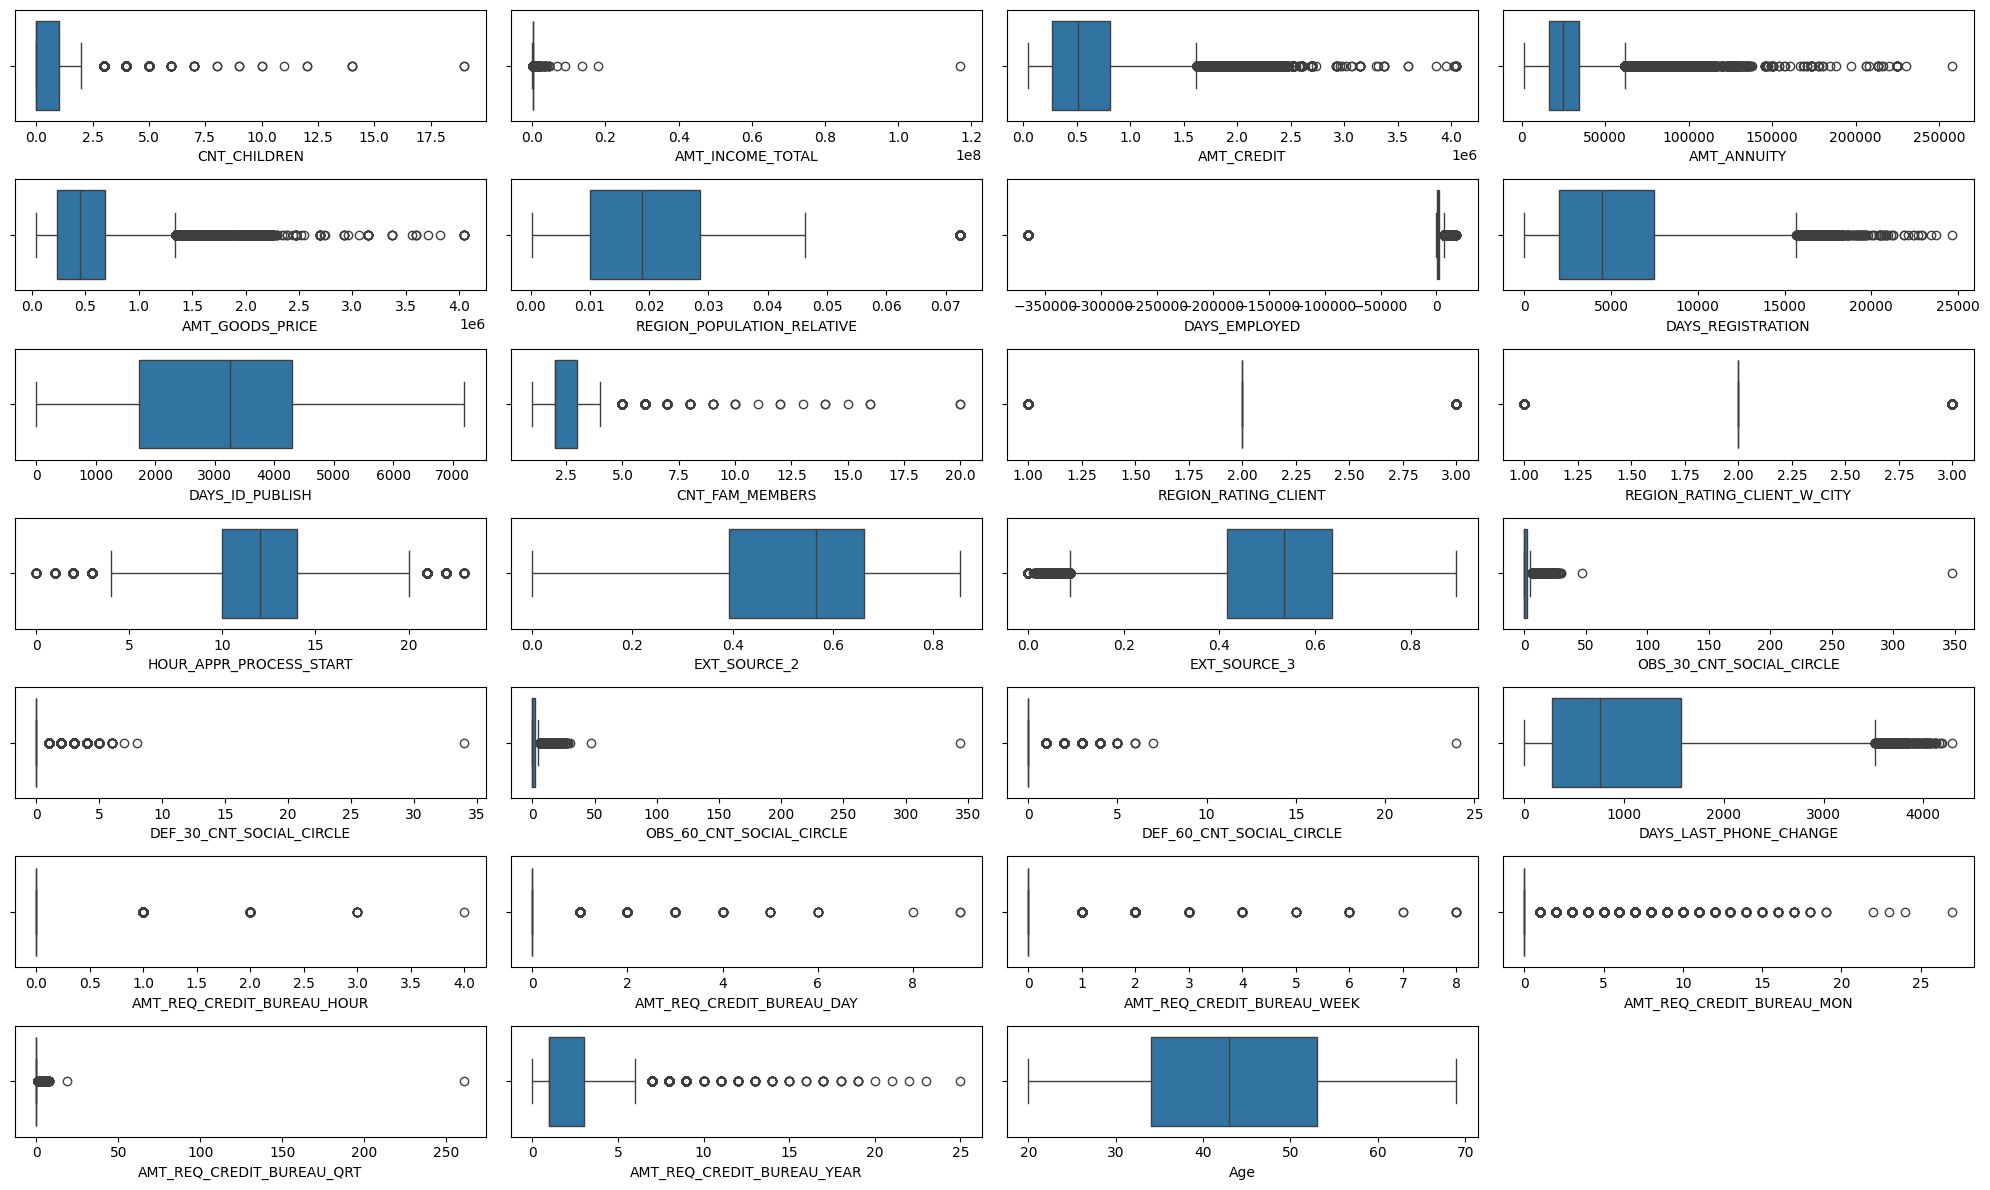

In [121]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(7,4,i)
    sns.boxplot(data=num[num_a], x=num[column])
    plt.tight_layout()

the abnormal column is the cnt_children column, so we need to remove the outlier in that column

Remove Outlier

In [122]:
print(f'Row before delete outlier at CNT_children :  {len(df)}')

filtered_entries = np.array([True] * len(df))

zscore = abs(stats.zscore(df['CNT_CHILDREN'])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Row after delete outlier at CNT_children : {len(df)}')

Row before delete outlier at CNT_children :  307511
Row after delete outlier at CNT_children : 303239


Feature Transformation

In [123]:
x = df.drop(columns = 'TARGET', axis=1)
num = x[num_a]

In [124]:
num_mean = num.mean()
num_std = num.std()

num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,-0.459710,0.385831,0.577304,-1.320962,...,0.252564,5.254914,-0.206172,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,-1.544674
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.463592,1.083617,1.789288,-0.131831,...,-0.168056,-0.275683,0.163731,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.122835
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.456807,0.212377,0.304955,-1.320962,...,-0.588676,-0.275683,0.179446,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.706463
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.476632,-1.367137,0.367244,-0.131831,...,0.252564,-0.275683,0.418795,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,0.706463
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.476625,0.197922,-0.309320,-1.320962,...,-0.588676,-0.275683,-0.172324,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.873213


In [125]:
num_1 = x[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num = pd.concat([num, num_1], axis=1)
num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,-0.459710,0.385831,0.577304,-1.320962,...,0,1,1,0,0,0,0,0,0,0
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.463592,1.083617,1.789288,-0.131831,...,0,1,1,0,0,0,0,0,0,0
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.456807,0.212377,0.304955,-1.320962,...,1,1,1,0,0,0,0,0,0,0
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.476632,-1.367137,0.367244,-0.131831,...,0,1,0,0,0,0,0,0,0,0
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.476625,0.197922,-0.309320,-1.320962,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.589198,-0.047118,-0.855088,0.032003,-0.848093,0.843848,-0.456884,-0.976864,0.668749,-1.320962,...,0,1,0,0,0,0,0,0,0,0
307507,-0.589198,-0.405740,-0.818198,-1.042382,-0.848093,0.309175,2.118014,0.176098,-0.728114,-1.320962,...,0,1,1,0,0,0,0,0,0,0
307508,-0.589198,-0.065993,0.195641,0.199205,0.126562,-1.148184,-0.511027,-0.489661,-1.430522,-1.320962,...,0,1,0,1,0,0,0,0,1,1
307509,-0.589198,0.009507,-0.568393,-0.475821,-0.592246,-1.125704,-0.488940,0.693628,1.365193,-0.131831,...,0,1,0,0,0,0,0,1,1,0


Object data type

Feature Transformation

In [126]:
obj = x.select_dtypes(include='object')
df_obj = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
df_obj = df_obj.rename(columns = {'index' : 'Name_of_column'})

obj_1 = []
obj_2 = []
for i,y in enumerate(df_obj.Name_of_column):
    if df_obj['Total_unique'][i] > 2:
        obj_1.append(y)
    else:
        obj_2.append(y)
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,Marital_status
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Unmarried
1,Cash loans,F,N,N,Family,State servant,Higher education,House / apartment,Core staff,MONDAY,School,Married
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,MONDAY,Government,Unmarried
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Married
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,THURSDAY,Religion,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,With parents,Sales staff,THURSDAY,Services,Unmarried
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,House / apartment,Laborers,MONDAY,Business Entity Type 3,Unmarried
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,House / apartment,Managers,THURSDAY,School,Unmarried
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,Married


One hot encoding

In [127]:
for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)

obj = obj.drop(columns = obj_1)

Label Encoding

In [128]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])

obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,Marital_status,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,1,0,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1,0,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307507,0,0,0,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307508,0,0,0,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,0,0,0,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [129]:
df_train = pd.concat([num, obj], axis=1)

In [130]:
df = pd.concat([df_train, df['TARGET']],axis=1)

Data splitting

In [131]:
x = df.drop(columns = 'TARGET')
y = df['TARGET']

Oversampling

In [132]:
sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x, y.ravel())

<ipython-input-132-47bc8102c105>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x_over, y_over = sm.fit_resample(x, y.ravel())


In [133]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)

Undersampling

In [134]:
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x, y.ravel())

<ipython-input-134-ed62ec07d39f>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  x_under, y_under = rus.fit_resample(x, y.ravel())


In [135]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_under, y_under, test_size=0.3, random_state=42)


Train Logistic Regression Model

With oversampling Data

In [136]:
def confusionmatrix(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     83391
           1       0.99      0.88      0.93     83915

    accuracy                           0.94    167306
   macro avg       0.94      0.94      0.94    167306
weighted avg       0.94      0.94      0.94    167306



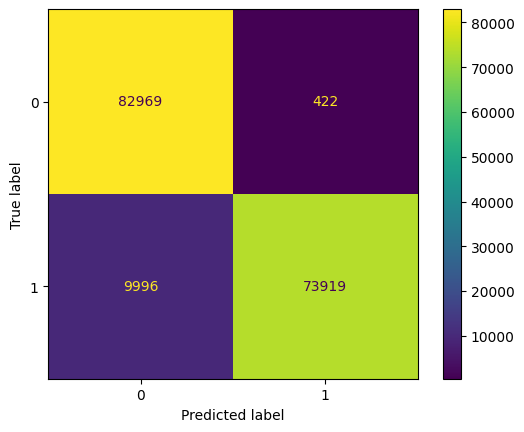

In [137]:
lr1 = LogisticRegression()
lr1.fit(x_train, y_train.ravel())
predictions = lr1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    195452
           1       0.99      0.88      0.93    194928

    accuracy                           0.94    390380
   macro avg       0.94      0.94      0.94    390380
weighted avg       0.94      0.94      0.94    390380



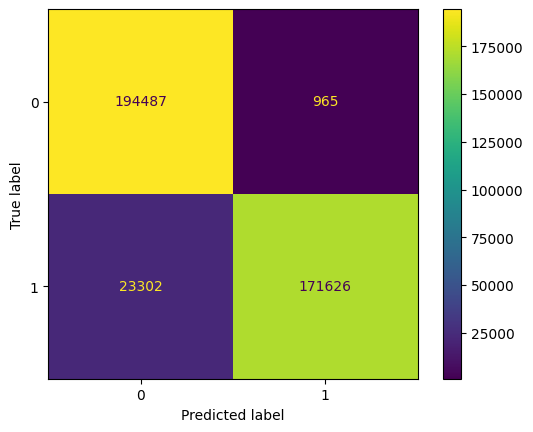

In [138]:
predictions = lr1.predict(x_train)

# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

With undersampling data

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7289
           1       0.68      0.66      0.67      7349

    accuracy                           0.68     14638
   macro avg       0.68      0.68      0.68     14638
weighted avg       0.68      0.68      0.68     14638



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


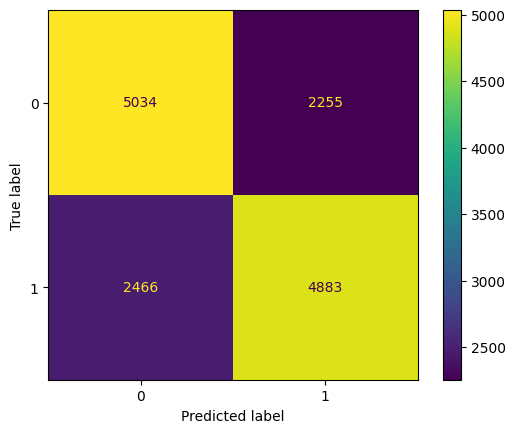

In [139]:
lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2)
predictions2 = lr2.predict(x_test2)

# print classification report
print(classification_report(y_test2, predictions2))
confusionmatrix(predictions2, y_test2)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     17107
           1       0.68      0.67      0.68     17047

    accuracy                           0.68     34154
   macro avg       0.68      0.68      0.68     34154
weighted avg       0.68      0.68      0.68     34154



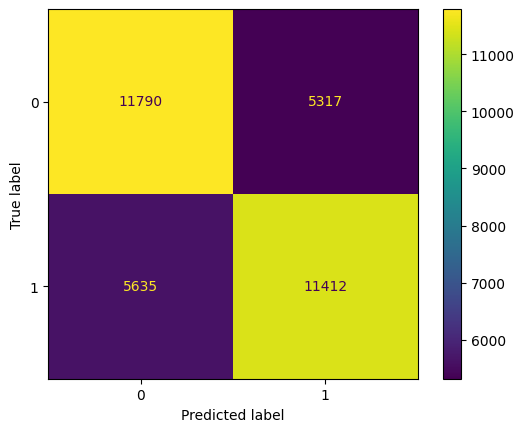

In [140]:
predictions = lr2.predict(x_train2)

# print classification report
print(classification_report(y_train2, predictions))
confusionmatrix(predictions, y_train2)

Train XGBoost Model

With oversampling data

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     83391
           1       1.00      0.91      0.95     83915

    accuracy                           0.95    167306
   macro avg       0.96      0.95      0.95    167306
weighted avg       0.96      0.95      0.95    167306



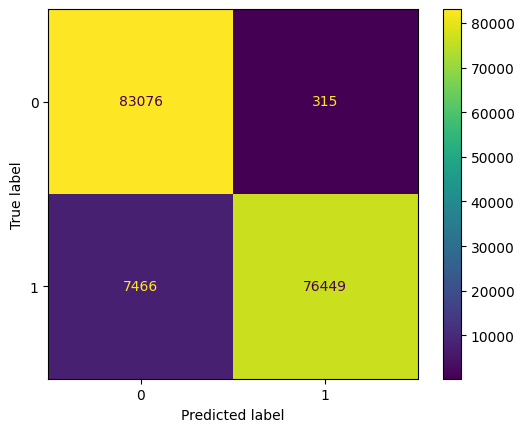

In [141]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train.ravel())

predictions = xgb_model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    195452
           1       1.00      0.91      0.95    194928

    accuracy                           0.96    390380
   macro avg       0.96      0.96      0.96    390380
weighted avg       0.96      0.96      0.96    390380



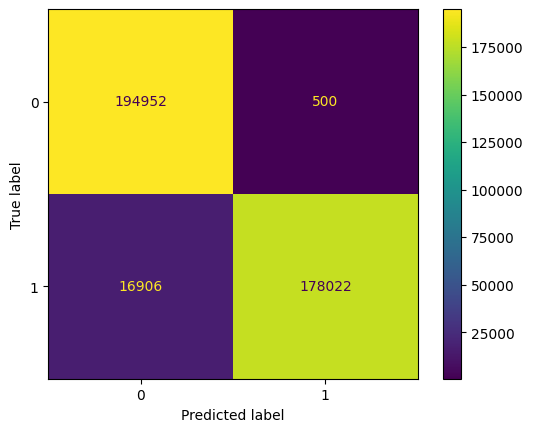

In [142]:
predictions = xgb_model.predict(x_train)

# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

Random Forest

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     83391
           1       0.98      0.93      0.95     83915

    accuracy                           0.95    167306
   macro avg       0.96      0.95      0.95    167306
weighted avg       0.96      0.95      0.95    167306



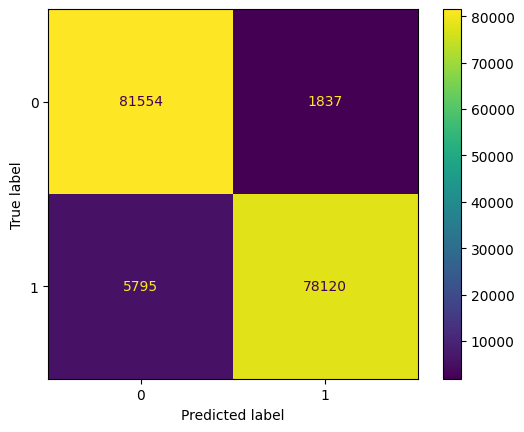

In [143]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
predictions = rf_model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    195452
           1       1.00      1.00      1.00    194928

    accuracy                           1.00    390380
   macro avg       1.00      1.00      1.00    390380
weighted avg       1.00      1.00      1.00    390380



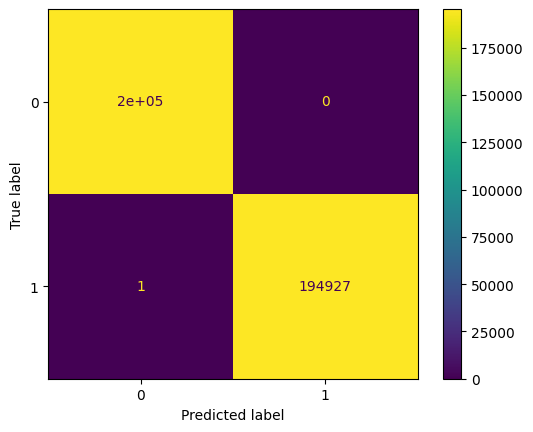

In [144]:

predictions = rf_model.predict(x_train)

# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

From 3 model, Random forest was the best because random forest have a higher accuracy, precision and recall than the others.

Prediction

In [145]:
df_test = pd.read_csv('application_test.csv')

In [146]:
df_test['CODE_GENDER'] = df_test['CODE_GENDER'].replace(['XNA'], df_test['CODE_GENDER'].mode()[0])
df_test['ORGANIZATION_TYPE'] = df_test['ORGANIZATION_TYPE'].replace(['XNA'], df_test['ORGANIZATION_TYPE'].mode()[0])

Marital_status = []
married = ['Married', 'Civil marriage']

for i in df_test.NAME_FAMILY_STATUS:
    if i in married:
        Marital_status.append('Married')
    else:
        Marital_status.append('Unmarried')

df_test['Marital_status'] = Marital_status
df_test.drop(columns= 'NAME_FAMILY_STATUS', inplace=True)

df_test['Age'] = np.floor(df_test['DAYS_BIRTH'] / -365).astype(int)
df_test.drop(columns= 'DAYS_BIRTH', inplace=True)

In [147]:
count_nv = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(df) ) * 100
still_null = count_nv[count_nv['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

In [148]:
a = list(still_null['index'])

for i in a:
    data = df_test[i]
    types = str(data.dtype)
    if types == 'object':
        df_test[i].fillna(df_test[i].mode()[0], inplace=True)
    else:
        df_test[i].fillna(df_test[i].median(), inplace=True)

In [149]:
num = df_test[num_a]

In [150]:
num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,-0.589198,-0.141492,-0.074799,-0.451269,-0.238934,-0.147217,-0.471630,-0.045538,1.444048,-0.131831,...,-0.588676,-0.275683,-0.938725,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.706463
1,-0.589198,-0.292491,-0.934414,-0.671615,-0.969925,1.077392,-0.486707,-1.164490,0.906640,-0.131831,...,-0.588676,-0.275683,1.164645,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,0.691001,0.456336
2,-0.589198,0.141631,0.159868,2.947791,0.248394,-0.129074,-0.486630,0.803313,-0.339140,-0.131831,...,-0.588676,-0.275683,0.129884,-0.07111,-0.058754,-0.155798,-0.270044,1.032087,1.257036,0.873213
3,2.528453,0.613502,2.424807,1.514138,2.806865,0.397937,-0.468368,0.852911,-0.806307,2.246432,...,-0.588676,-0.275683,-1.017299,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,0.691001,-0.460793
4,0.969627,0.047256,0.066055,0.343410,0.236211,-0.784603,-0.470658,0.286066,-0.842090,1.057301,...,-0.588676,-0.275683,0.172193,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,0.124965,-0.710920


In [151]:
num_1 = df_test[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num = pd.concat([num, num_1], axis=1)
num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.589198,-0.141492,-0.074799,-0.451269,-0.238934,-0.147217,-0.471630,-0.045538,1.444048,-0.131831,...,0,1,0,1,0,0,0,0,0,0
1,-0.589198,-0.292491,-0.934414,-0.671615,-0.969925,1.077392,-0.486707,-1.164490,0.906640,-0.131831,...,0,1,0,0,0,0,0,0,0,0
2,-0.589198,0.141631,0.159868,2.947791,0.248394,-0.129074,-0.486630,0.803313,-0.339140,-0.131831,...,0,1,0,0,0,0,0,0,0,0
3,2.528453,0.613502,2.424807,1.514138,2.806865,0.397937,-0.468368,0.852911,-0.806307,2.246432,...,0,1,1,0,0,0,0,0,0,0
4,0.969627,0.047256,0.066055,0.343410,0.236211,-0.784603,-0.470658,0.286066,-0.842090,1.057301,...,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-0.589198,-0.198116,-0.462932,-0.664467,-0.726261,-1.362140,-0.491639,-1.157688,-0.270224,-1.320962,...,1,1,1,0,0,0,0,0,0,0
48740,2.528453,-0.047118,0.058386,0.332532,-0.117102,1.077392,-0.463317,0.565238,-0.007815,2.246432,...,0,1,0,0,0,0,0,0,1,1
48741,0.969627,0.141631,-0.705290,0.422038,-0.604429,0.397937,-0.476618,0.659901,0.985495,1.057301,...,0,1,1,0,0,0,0,0,0,0
48742,-0.589198,0.236005,-0.369923,-0.135821,-0.238934,-0.147217,-0.474462,1.005676,1.078266,-0.131831,...,1,1,1,0,0,1,1,0,1,1


In [152]:
obj = df_test.select_dtypes(include='object')

for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)

obj = obj.drop(columns = obj_1)

In [153]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])

obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,Marital_status,NAME_TYPE_SUITE_Children,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,0,0,1,reg oper account,block of flats,"Stone, brick",No,0,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0,1,reg oper account,block of flats,Panel,No,0,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,1,1,reg oper account,block of flats,Panel,No,0,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,0,1,reg oper account,block of flats,Panel,No,0,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1,1,0,reg oper account,block of flats,Panel,No,0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,reg oper account,block of flats,Panel,No,1,False,...,False,False,False,False,False,False,False,False,False,False
48740,0,0,0,0,reg oper account,block of flats,Panel,No,0,False,...,False,False,False,False,True,False,False,False,False,False
48741,0,0,1,1,reg oper account,block of flats,"Stone, brick",No,0,False,...,False,False,False,False,False,False,False,False,False,False
48742,0,1,0,0,reg oper account,block of flats,Panel,No,0,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
df_test = pd.concat([num, obj], axis=1)

In [155]:
train = set(df.columns)

In [156]:
train.remove('TARGET')

In [157]:
not_in_test = train - set(df_test.columns)
not_in_test = list(not_in_test)

In [158]:
df_test[not_in_test] = 0

In [159]:
column_train = list(df.columns)
column_train.remove('TARGET')
df_test = df_test[column_train]

In [160]:
predictions = rf_model.predict(df_test)

In [161]:
df_test['TARGET'] = predictions

In [162]:
df_test['TARGET'].value_counts()

,count
TARGET,
0,47255
1,1489
